In [1]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import math
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub
%matplotlib inline
from PIL import Image


In [16]:
images = []
for root, dirnames, filenames in os.walk("/media/guru/98306C94306C7AE0/Projects/VOCdevkit/VOC2012/SegmentationClass/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        name = filename[:len(filename)-4] + ".jpg"
        train_filepath = os.path.join("/media/guru/98306C94306C7AE0/Projects/VOCdevkit/VOC2012/JPEGImages/",name)
        train_image = imread(train_filepath)
        labelled_image = imread(filepath)
        train_image = train_image[0:256,0:256,:]
        labelled_image = labelled_image[0:256,0:256,:]
        imsave("Train_images/"+name,train_image)
        imsave("Labelled_images/"+name, labelled_image)
        image = imread(filepath)
        images.append(image)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if sys.path[0] == '':


In [17]:
len(images)

2913

In [67]:
print(filename)

2011_003271.png


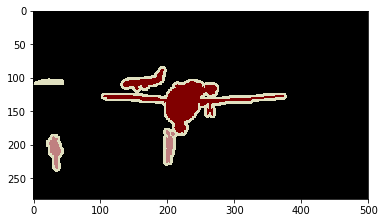

In [25]:
plt.imshow(images[0])

In [17]:
images[4].shape

(333, 500, 3)

In [10]:
test = Image.open("/media/guru/98306C94306C7AE0/Projects/VOCdevkit/VOC2012/SegmentationClass/2007_000032.png")

In [11]:
test = test.resize((256,256))

In [14]:
test = np.array(test)

In [15]:
test.shape

(256, 256)

In [53]:
test = Image.open("/media/guru/98306C94306C7AE0/Projects/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg")

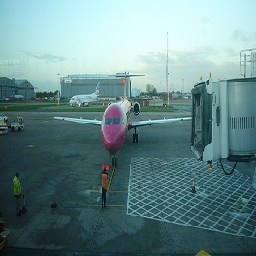

In [54]:
test.resize((256,256))

In [62]:
imsave("Sample/blah.jpg",test)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


In [3]:
t = imread("/home/guru/Desktop/Deep_Lab/Labelled_images/2007_000032.jpg")

In [5]:
t.shape

(256, 256)

In [ ]:
/media/guru/98306C94306C7AE0/Projects/VOCdevkit/VOC2012

In [18]:
def pascal_classes():
  classes = {'aeroplane' : 1,  'bicycle'   : 2,  'bird'        : 3,  'boat'         : 4, 
             'bottle'    : 5,  'bus'       : 6,  'car'         : 7,  'cat'          : 8, 
             'chair'     : 9,  'cow'       : 10, 'diningtable' : 11, 'dog'          : 12, 
             'horse'     : 13, 'motorbike' : 14, 'person'      : 15, 'potted-plant' : 16, 
             'sheep'     : 17, 'sofa'      : 18, 'train'       : 19, 'tv/monitor'   : 20}

  return classes


In [19]:
def pascal_palette():
  palette = {(  0,   0,   0) : 0 ,
             (128,   0,   0) : 1 ,
             (  0, 128,   0) : 2 ,
             (128, 128,   0) : 3 ,
             (  0,   0, 128) : 4 ,
             (128,   0, 128) : 5 ,
             (  0, 128, 128) : 6 ,
             (128, 128, 128) : 7 ,
             ( 64,   0,   0) : 8 ,
             (192,   0,   0) : 9 ,
             ( 64, 128,   0) : 10,
             (192, 128,   0) : 11,
             ( 64,   0, 128) : 12,
             (192,   0, 128) : 13,
             ( 64, 128, 128) : 14,
             (192, 128, 128) : 15,
             (  0,  64,   0) : 16,
             (128,  64,   0) : 17,
             (  0, 192,   0) : 18,
             (128, 192,   0) : 19,
             (  0,  64, 128) : 20 }

  return palette

In [56]:
def convert_color_to_label(image):
    l = image.shape[0]
    b = image.shape[1]
    print(l)
    print(b)
    palette = pascal_palette()
    label = np.zeros((l,b),dtype=np.uint8)
    print(label.shape)
    for i in range(l):
        for j in range(b):
            t = image[i][j]
            t = tuple(t)
            print(t)
           # print(type(t))
            label[i][j] = palette[t]
    return label

In [57]:
image = imread("/home/guru/Desktop/Deep_Lab/Labelled_images/2007_000032.jpg")

In [63]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [58]:
label = convert_color_to_label(image)

256
256
(256, 256)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(

(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)


KeyError: (0, 1, 0)